##Desafio Prático 1: Visualizando Dados Diferentes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# 1)
df_saude = pd.read_csv("/content/saude.csv")

display(df_saude.head())

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


In [ ]:
df_saude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10 non-null     int64 
 1   age     10 non-null     int64 
 2   height  10 non-null     int64 
 3   weight  10 non-null     int64 
 4   gender  10 non-null     object
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


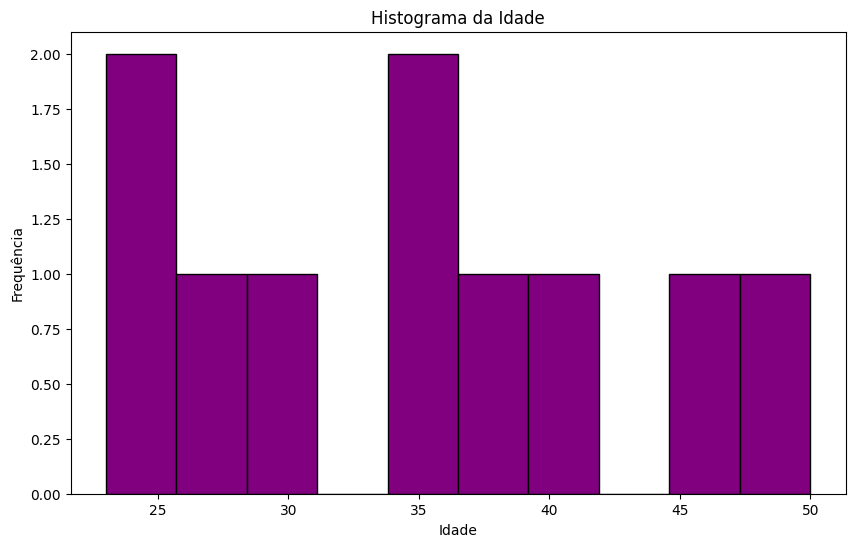

In [ ]:
# 2)

plt.figure(figsize=(10, 6))
plt.hist(df_saude['age'], bins=10, color='purple', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

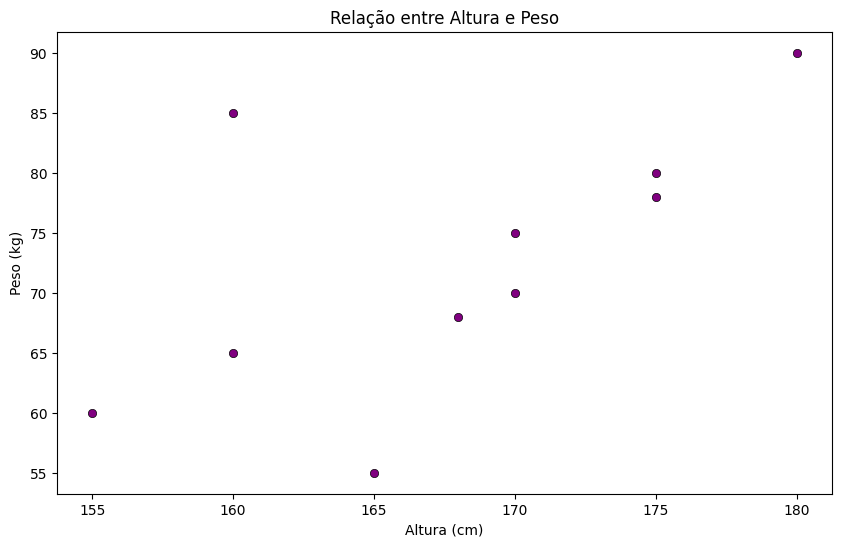

In [ ]:
# 3)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='height', y='weight', data=df_saude, color='purple', edgecolor='black')
plt.title('Relação entre Altura e Peso')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.grid(False)
plt.show()

In [ ]:
# 4)

gender_counts = df_saude['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
fig = px.bar(gender_counts, x='gender', y='count', title='Contagem de Indivíduos por Gênero', labels={'gender': 'Gênero', 'count': 'Contagem'}, color_discrete_sequence=['purple'])
fig.show()



##Desafio Prático 2: Séries Temporais


In [ ]:
# 1)
df_venda = pd.read_csv("/content/vendas.csv")

display(df_venda.head())

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


In [ ]:
df_venda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    31 non-null     object
 1   sales   31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


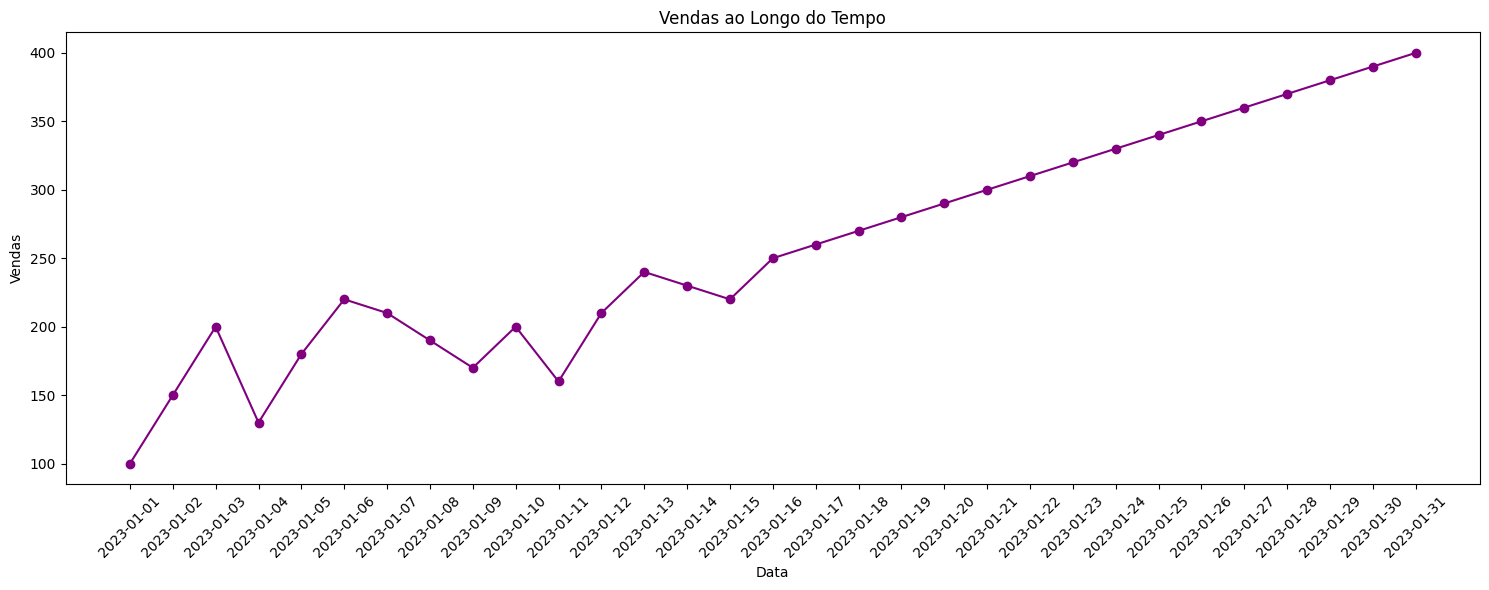

In [ ]:
# 2)

plt.figure(figsize=(15, 6))
plt.plot(df_venda['date'], df_venda['sales'], marker='o', linestyle='-', color='purple')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_venda['date'] = pd.to_datetime(df_venda['date'])

In [ ]:
df_venda.set_index('date', inplace=True)

In [ ]:
print(df_venda.index)

print(type(df_venda.index))

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', name='date', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


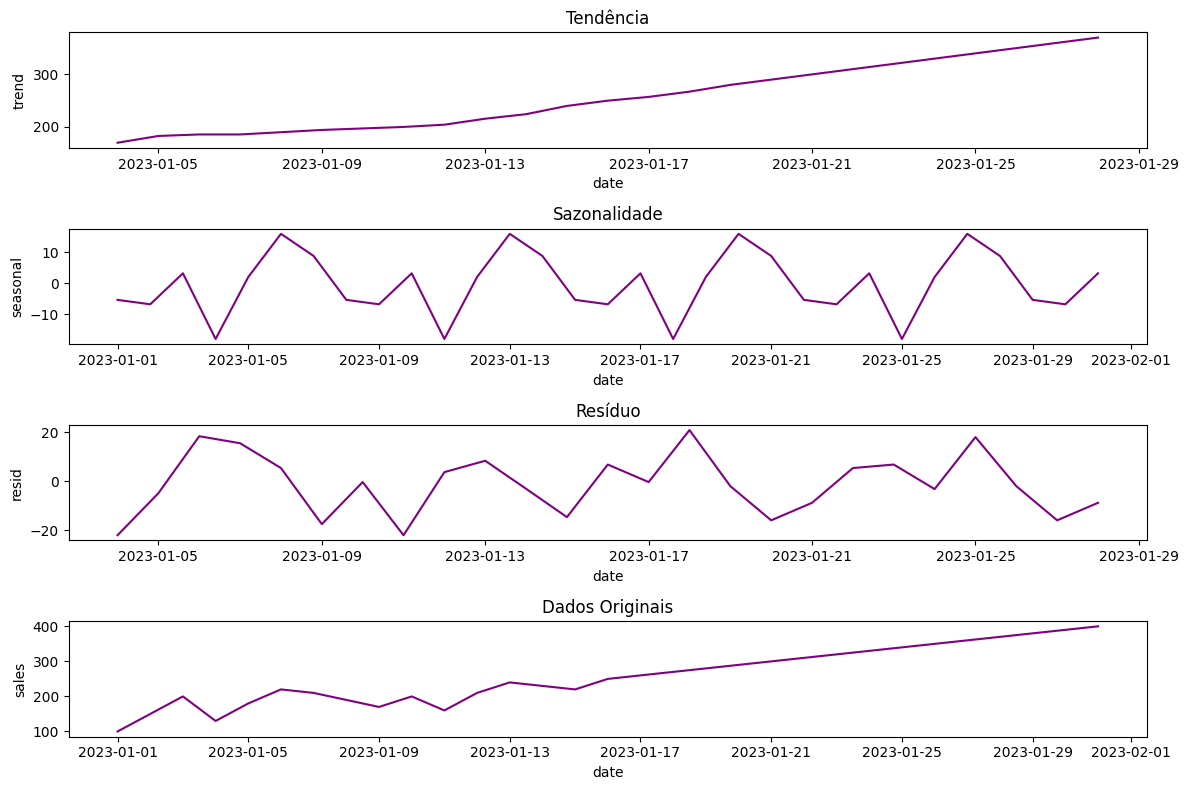

In [ ]:
# 3)


result = seasonal_decompose(df_venda['sales'], model='additive')

# Criar o gráfico de decomposição sazonal usando Seaborn
plt.figure(figsize=(12, 8))

# Plotar a tendência
plt.subplot(411)
sns.lineplot(x=result.trend.index, y=result.trend, color='purple')
plt.title('Tendência')

# Plotar a sazonalidade
plt.subplot(412)
sns.lineplot(x=result.seasonal.index, y=result.seasonal, color='purple')
plt.title('Sazonalidade')

# Plotar o componente residual
plt.subplot(413)
sns.lineplot(x=result.resid.index, y=result.resid, color='purple')
plt.title('Resíduo')

# Plotar os dados originais
plt.subplot(414)
sns.lineplot(x=df_venda.index, y=df_venda['sales'], color='purple')
plt.title('Dados Originais')

plt.tight_layout()
plt.show()

In [ ]:
# 4)

fig = px.line(df_venda, x='date', y='sales', title='Vendas ao Longo do Tempo', labels={'date': 'Data', 'sales': 'Vendas'}, color_discrete_sequence=['purple'])
fig.show()